# **Análisis exploratorio de datos del estudio**

## **Librerías**

In [1]:
from eda_auxiliary_functions import (make_general_histograms, 
                                 plot_stacked_barchart, 
                                 make_general_boxplots, 
                                 make_seasonal_decomposition,
                                 make_categories_pie_chart,
                                 count_outliers,
                                 replace_outliers,
                                 check_remove_duplicates,
                                 pivot_from_column_ref)
import warnings
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
warnings.filterwarnings('ignore')

## **Análisis de dataset de generación / demanda de energía eléctrica en España**

### **Estructura general del dataset**

In [3]:
energy = pd.read_csv("energy_dataset.csv")
print("Shape:", energy.shape)
energy.head(3)

Shape: (35064, 29)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48


### **Tipos de datos**

In [4]:
pd.DataFrame(energy.dtypes).T

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


**Observación:** La columna de tiempo "time" no está en formato *datetime*, se procede a convertirla

In [5]:
energy["time"] = pd.to_datetime(energy["time"].str[0:-6])

### **Revisión y limpieza de duplicados**

In [6]:
energy = check_remove_duplicates(energy, ["time"], "last")

Se eliminaron 4 registros         duplicados conservando por last.


### **Distribuciones generales de las variables numéricas**

In [7]:
energy.describe()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35060,35041.000000,35042.000000,35042.0,35042.000000,35042.000000,35041.000000,35042.0,35042.0,35042.0,0.0,35041.000000,35041.000000,35042.000000,35041.0,35043.000000,35042.000000,35042.000000,35042.000000,35041.000000,35042.0,35042.000000,35060.000000,0.0,35060.000000,35060.000000,35024.000000,35060.000000,35060.000000
mean,2016-12-31 11:46:00.068454400,383.513427,448.062125,0.0,5622.889989,4256.165287,298.324249,0.0,0.0,0.0,NaN,475.422705,972.178191,2605.355459,0.0,6263.927318,60.228098,85.639404,1432.826094,269.449217,0.0,5464.500999,1439.227695,NaN,5471.250941,28713.065545,28697.885593,49.874857,57.884397
min,2015-01-01 00:00:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,2016-01-01 05:45:00,333.000000,0.000000,0.0,4126.000000,2527.250000,263.000000,0.0,0.0,0.0,NaN,0.000000,637.000000,1078.000000,0.0,5760.000000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24795.000000,24808.750000,41.490000,49.340000
50%,2016-12-31 11:30:00,367.000000,509.000000,0.0,4969.500000,4474.000000,300.000000,0.0,0.0,0.0,NaN,68.000000,906.000000,2164.500000,0.0,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.500000,28902.000000,50.525000,58.020000
75%,2017-12-31 17:15:00,433.000000,757.000000,0.0,6429.000000,5839.000000,330.000000,0.0,0.0,0.0,NaN,615.000000,1250.000000,3757.000000,0.0,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32264.000000,32192.250000,60.530000,68.010000
max,2018-12-31 23:00:00,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,4523.000000,2000.000000,9728.000000,0.0,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000
std,NaN,85.353826,354.572443,0.0,2201.907706,1961.626686,52.520784,0.0,0.0,0.0,NaN,792.299335,400.756844,1835.165442,0.0,839.688492,20.238909,14.078007,1680.148879,50.197184,0.0,3213.748267,1677.731361,NaN,3176.373780,4593.527614,4574.393089,14.619519,14.204788


**Observación:** 
1. Las siguientes columnas están completamente conformadas por valores cero o nulo:
* 'generation fossil coal-derived gas'
* 'generation fossil oil shale'
* 'generation fossil peat'
* 'generation geothermal' 
* 'generation hydro pumped storage aggregated'
* 'generation marine'
* 'generation wind offshore'
* 'forecast wind offshore eday ahead'
<br><br>

2. Dado que el objetivo del proyecto consta de realizar predicciones acorde a diversos lapsos de anticipación al mercado mayorista de electricidad, se opta por omitir las columnas que no hacen referencia a las condiciones del instante en que se realizaría la predicción real:
* 'forecast solar day ahead'
* 'forecast wind onshore day ahead'
* 'price actual'
* 'price day ahead'
* 'total load forecast'


<br>
Por lo tanto, se procede a eliminarlas las columnas previamente mencionadas no agregar ninguna información relevante al caso de estudio.

In [8]:
useless_columns = ['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal' , 
                   'generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead',
                   'forecast solar day ahead', 'forecast wind onshore day ahead', 'price actual', 'price day ahead', 'total load forecast']
energy = energy.drop(useless_columns, axis=1)
print("Shape:", energy.shape)

Shape: (35060, 16)


### **Distribuciones generales de variables numéricas (gráfico)**

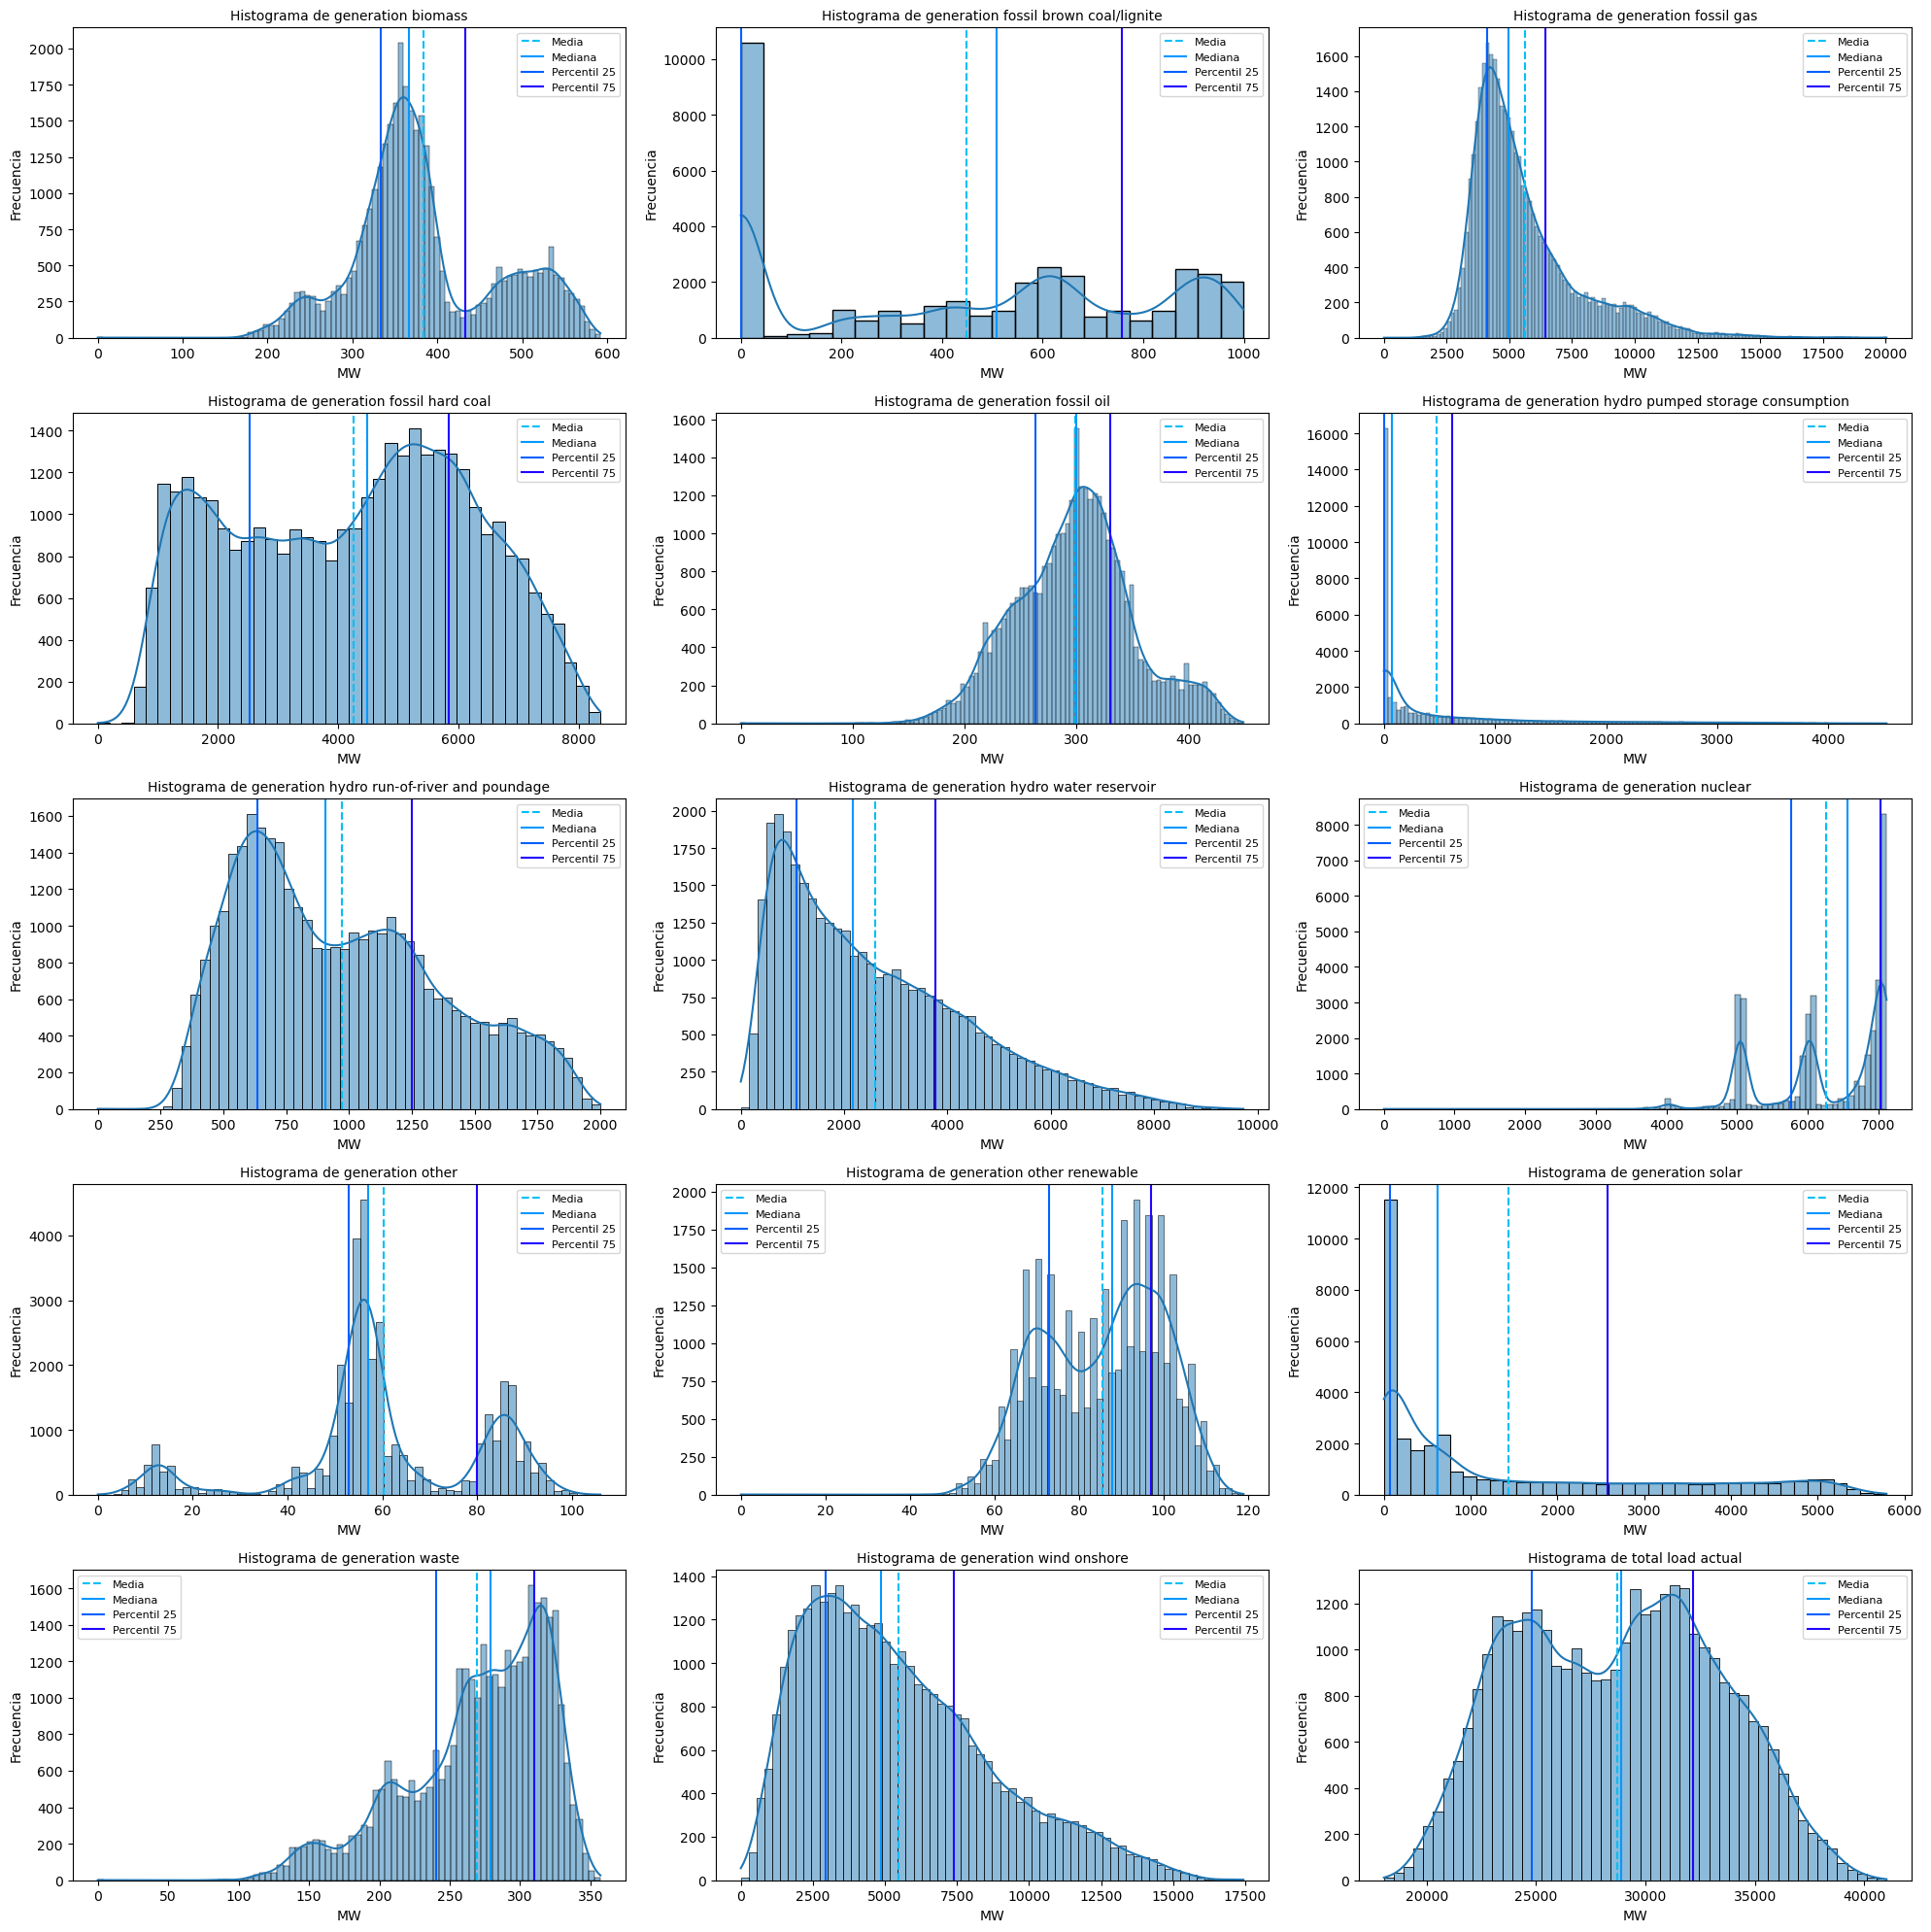

In [9]:
make_general_histograms(energy, figsize=(20, 20), xlabel="MW", group_cols_N=3)

### **Identificación y reemplazo de datos atípicos**

###
**Identificación**

Se buscan datos atípicos en múltiples columnas por fuera de 1.5 IQR.

In [10]:
count_outliers(energy)

,column,outlier_count
5,generation hydro pumped storage consumption,3770
2,generation fossil gas,2185
9,generation other,1267
13,generation wind onshore,379
7,generation hydro water reservoir,343
...,...,...
1,generation fossil brown coal/lignite,0
3,generation fossil hard coal,0
6,generation hydro run-of-river and poundage,0
11,generation solar,0


###
**Reemplazo**

Se procede a reemplazarlas por la **media** de la distribución.

In [11]:
energy = replace_outliers(energy)

### **Acumulación mensual por tipo de generación de energía**

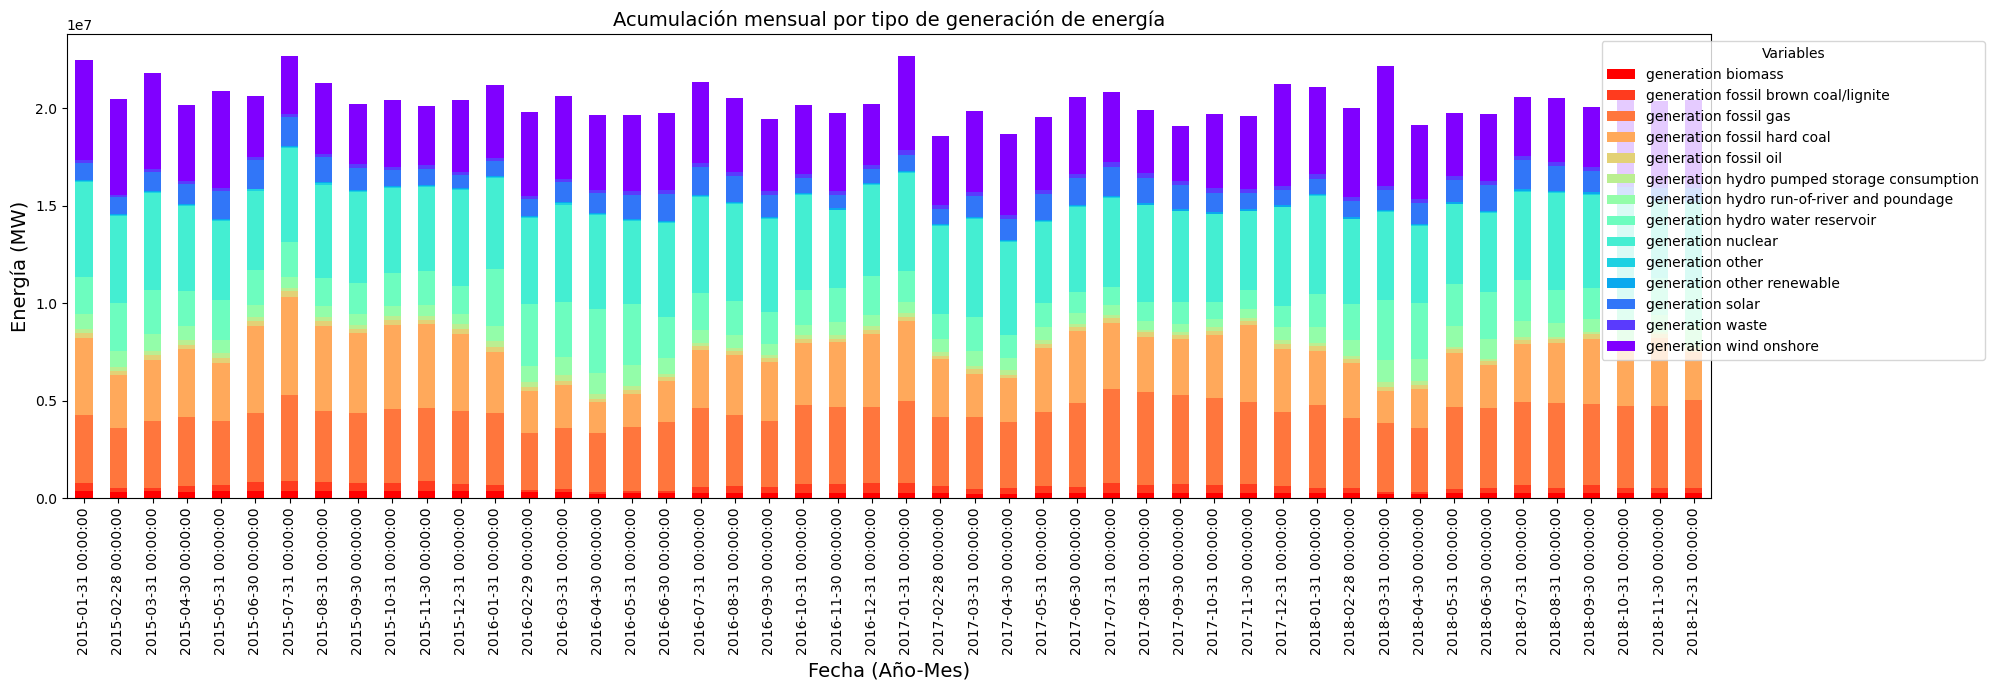

In [12]:
generation_cols = [value for value in energy.columns.tolist() if 'generation' in value]
plot_stacked_barchart(energy, generation_cols, frequency='M', figsize=(20, 7), 
                      title="Acumulación mensual por tipo de generación de energía", 
                      ylabel="Energía (MW)", 
                      xlabel="Fecha (Año-Mes)")

### **Descomposición estacional de demanda total de energía**

####
**Descomposición anual**

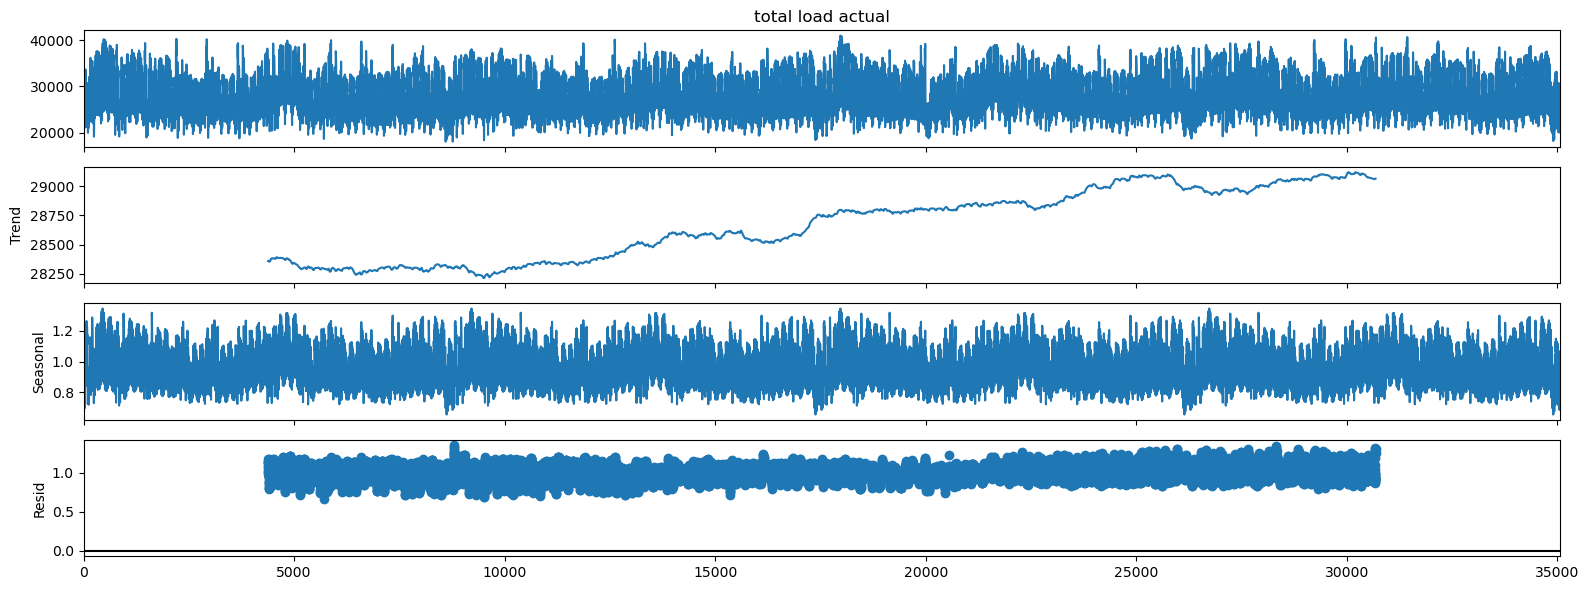

In [13]:
input_data = energy["total load actual"].fillna(method="ffill")
make_seasonal_decomposition(input_data, model='multiplicative', period=365*24)

####
**Descomposición semanal**

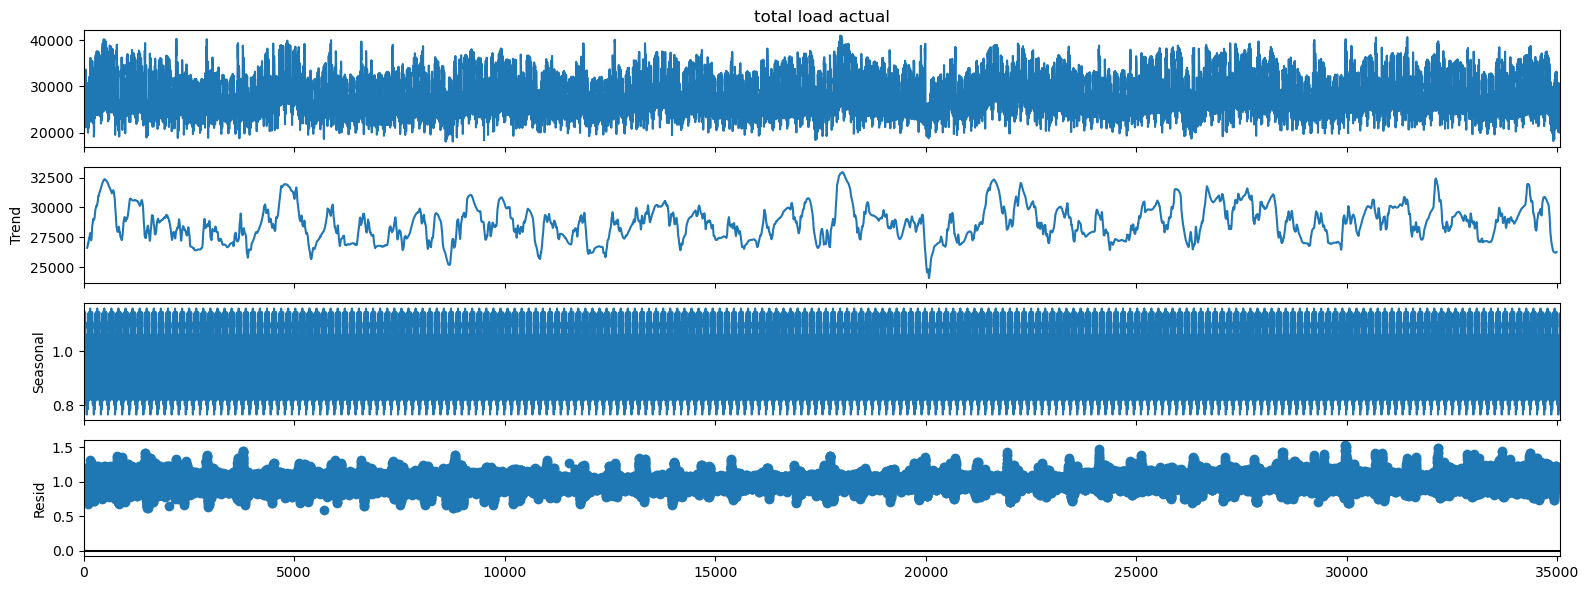

In [14]:
input_data = energy["total load actual"].fillna(method="ffill")
make_seasonal_decomposition(input_data, model='multiplicative', period=7*24)

==============================================================================================================================

## **Análisis de dataset de información meteorológica / climática en España**

### **Estructura general del dataset**

In [15]:
weather = pd.read_csv("weather_features.csv")
print("Shape:", weather.shape)
weather.head(3)

Shape: (178396, 17)


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


### **Tipos de datos**

In [16]:
pd.DataFrame(weather.dtypes).T

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,object,object,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,object,object,object


**Observación:** La columna de tiempo "dt_iso" no está en formato *datetime*, se procede a convertirla y cambiar su nombre a "time"

In [17]:
weather["time"] = pd.to_datetime(weather["dt_iso"].str[0:-6])
weather = weather.drop("dt_iso", axis=1)

### **Revisión y limpieza de duplicados**

In [18]:
weather = check_remove_duplicates(weather, ["time", "city_name"], "last")

Se eliminaron 3096 registros         duplicados conservando por last.


### **Distribuciones generales de las columnas numéricas**

In [19]:
weather.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,time
count,175300.000000,175300.000000,175300.000000,1.753000e+05,175300.000000,175300.000000,175300.000000,175300.000000,175300.000000,175300.000000,175300.000000,175300.000000,175300
mean,289.708181,288.428881,291.172867,1.070205e+03,68.030371,2.470143,166.725163,0.069312,0.000386,0.004847,24.344803,763.838403,2016-12-31 11:46:00.068454144
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,2015-01-01 00:00:00
25%,283.830000,282.785836,284.912000,1.013000e+03,53.000000,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,800.000000,2016-01-01 05:45:00
50%,289.150000,288.150000,290.150000,1.018000e+03,71.000000,2.000000,178.000000,0.000000,0.000000,0.000000,16.000000,800.000000,2016-12-31 11:30:00
75%,295.240000,294.150000,297.150000,1.022000e+03,87.000000,4.000000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000,2017-12-31 17:15:00
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.000000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000,2018-12-31 23:00:00
std,8.025089,7.948478,8.614051,6.022112e+03,21.838153,2.095206,116.546505,0.385936,0.007349,0.224560,30.339433,102.926057,NaN


### **Distribuciones generales de variables numéricas (gráfico)**

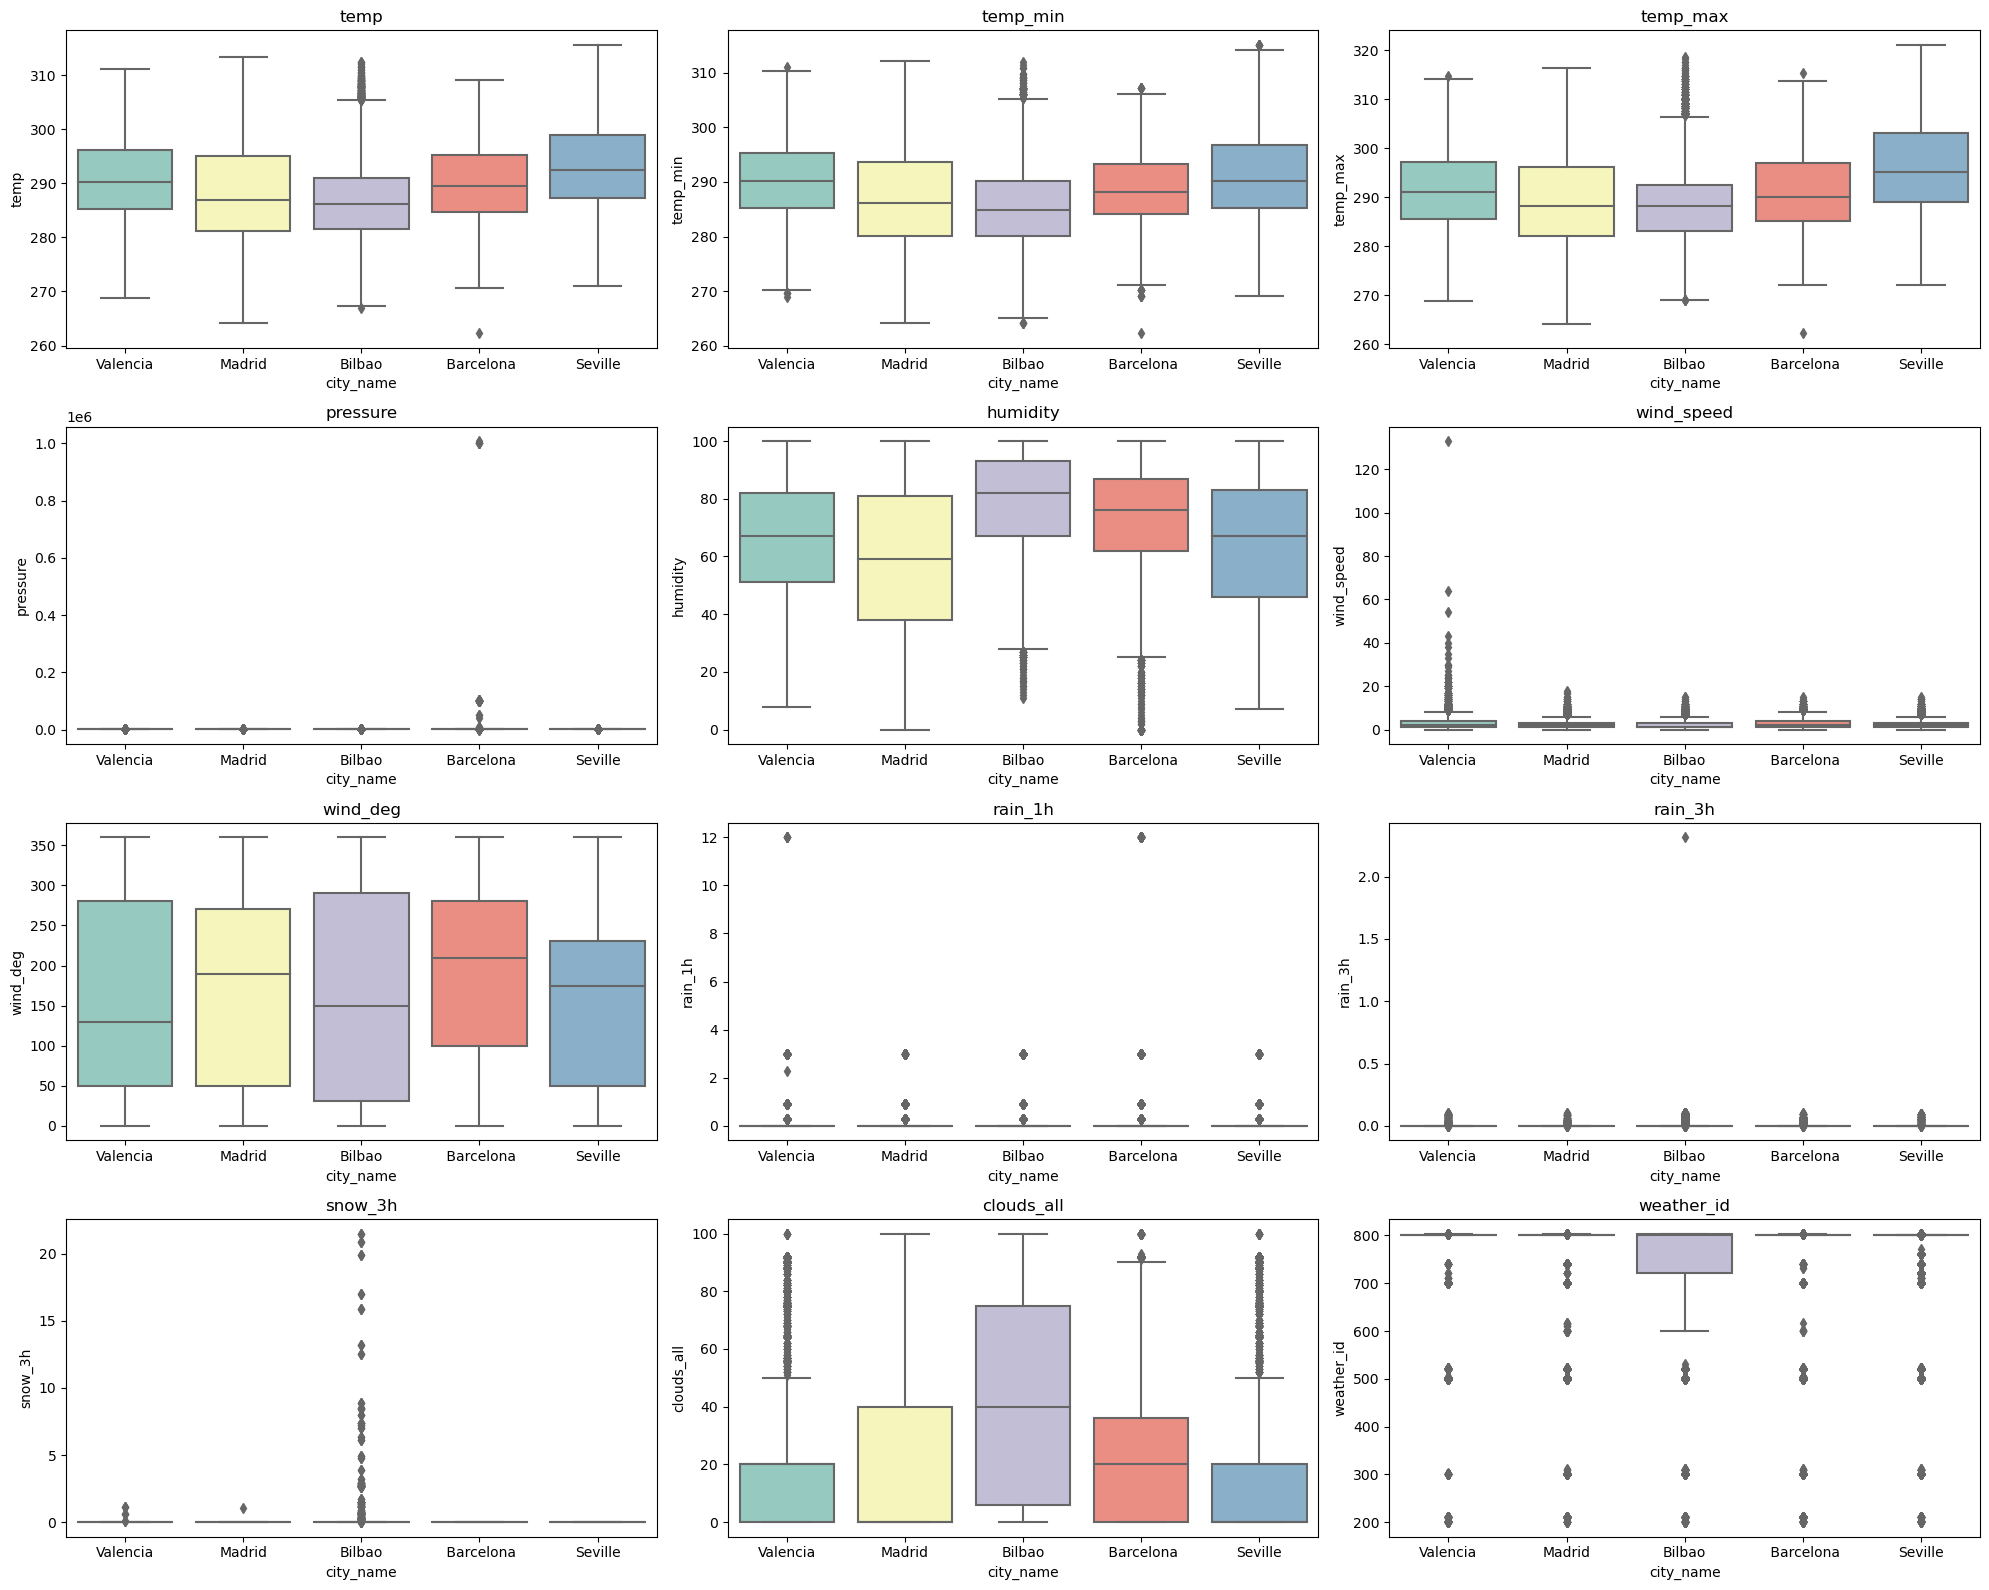

In [20]:
make_general_boxplots(weather, figsize=(20, 16))

### **Identificación y reemplazo de datos atípicos**


###
**Identificación**

Se buscan datos atípicos en múltiples columnas por fuera de 1.5 IQR.

In [21]:
count_outliers(weather)

,column,outlier_count
11,weather_id,44603
7,rain_1h,17390
3,pressure,11645
5,wind_speed,2378
8,rain_3h,1854
...,...,...
0,temp,202
1,temp_min,154
4,humidity,63
6,wind_deg,0


###
**Reemplazo**

Se procede a reemplazarlas por la **media** de la distribución.

In [22]:
weather = replace_outliers(weather)

### **Descomposición estacional de mediciones meteorológicas**

####
**Temperatura**

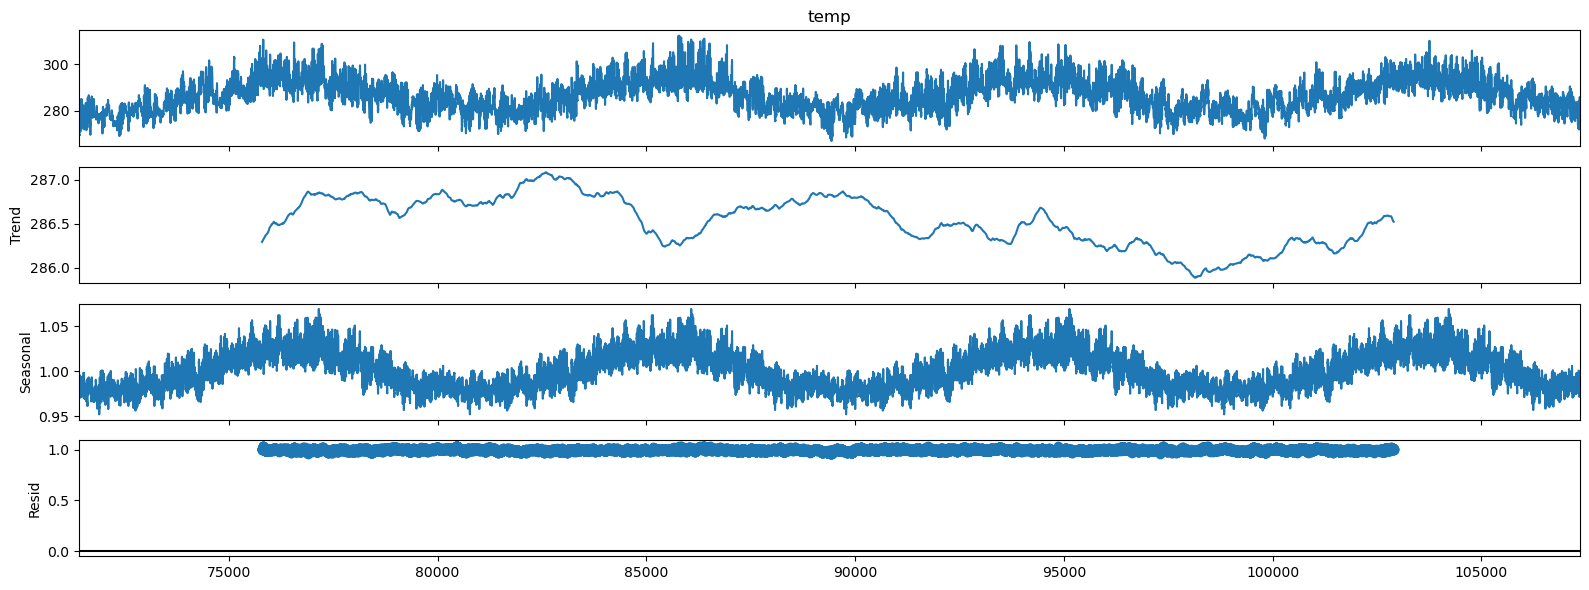

In [23]:
input_data = weather[weather["city_name"]=="Bilbao"]["temp"]
make_seasonal_decomposition(input_data, model='multiplicative', period=365*24)

####
**Porcentaje de nubes**

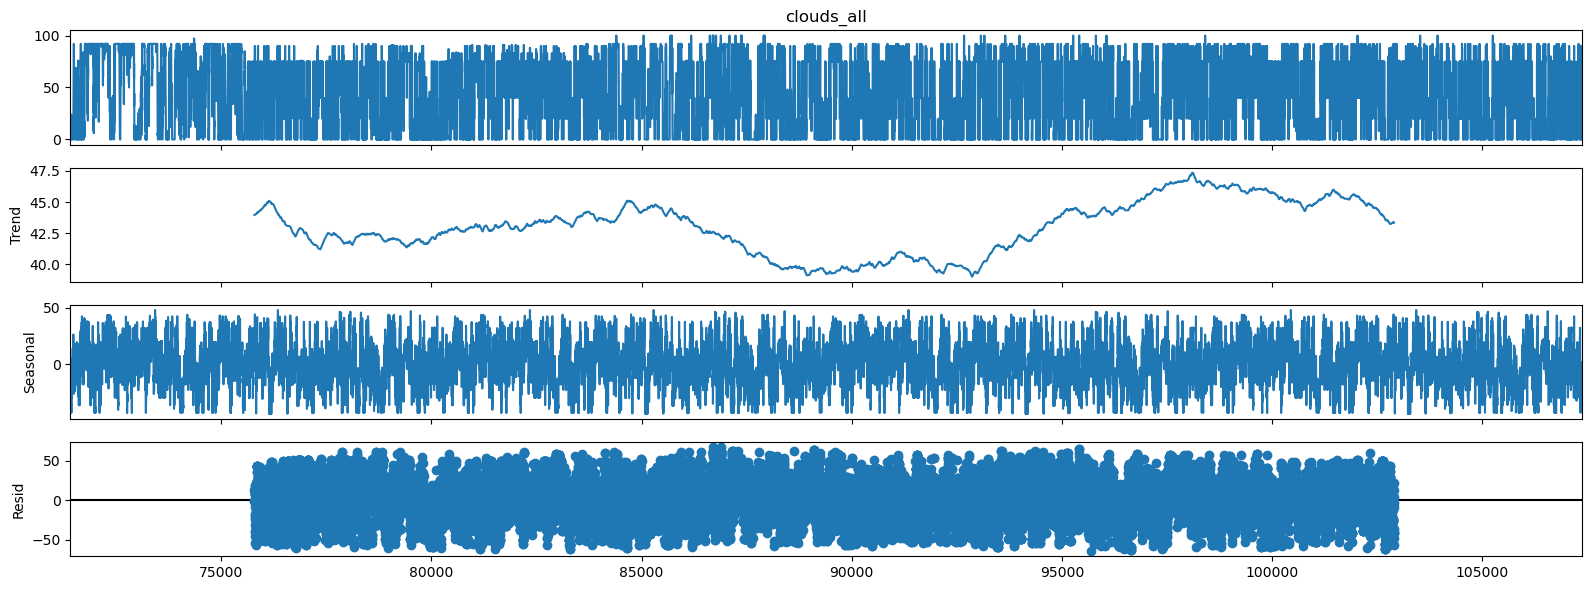

In [24]:
input_data = weather[weather["city_name"]=="Bilbao"]["clouds_all"]
make_seasonal_decomposition(input_data, model="additive", period=365*24)

### **Distribuciones generales de las columnas categóricas (textuales)**

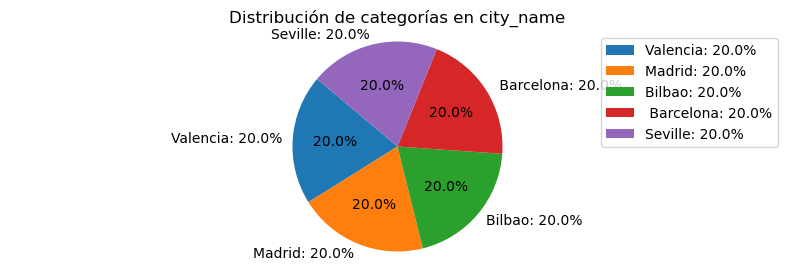

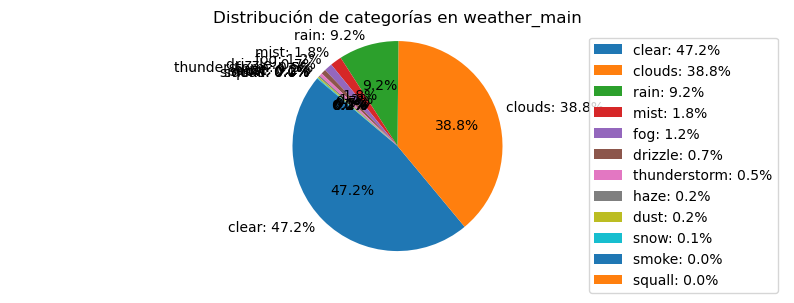

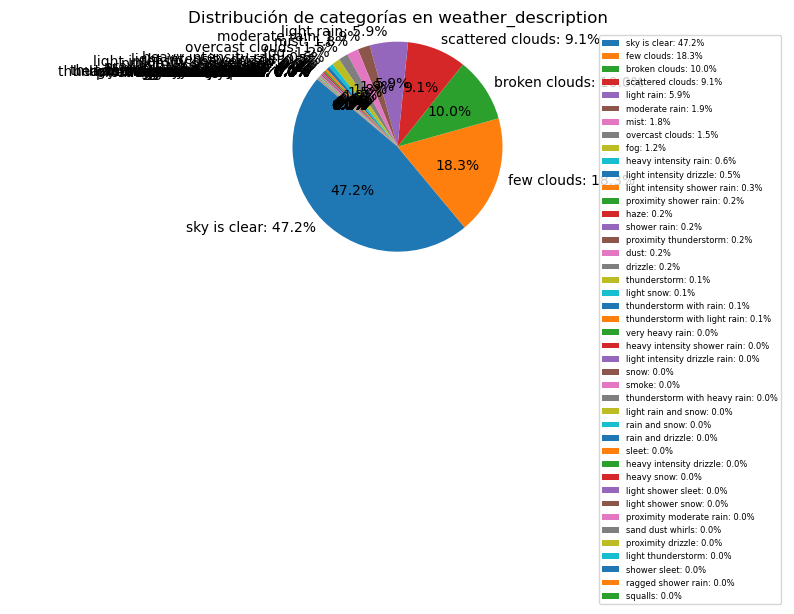

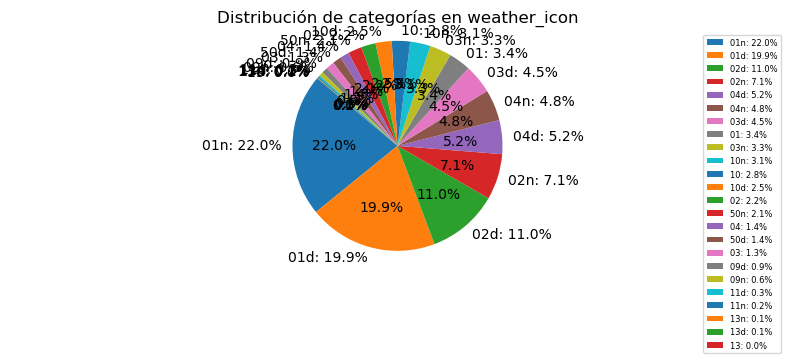

In [25]:
make_categories_pie_chart(weather, figsize=(10, 3))

**Observación:**

Las variables *'weather_icon'* y *'weather_id*', *'weather_main'*, *'weather_description'* únicamente son etiquetas textuales de lo representado en las columnas numéricas de las otras variables. De manera que no tienen un aporte significativo de información para el fenómeno a modelar, por lo que se descartarán para la fase de modelado.

In [26]:
weather = weather.drop(["weather_icon", "weather_id", "weather_main", "weather_description"], axis = 1)

### **Separación de variables por ciudad**

Se requiere utilizar evaluar las variables de las 4 ciudades simultáneamente para cada instante de tiempo. Para ello se realiza un pivot de la información para generar una nueva columna por cada variable y ciudad.

In [27]:
weather = pivot_from_column_ref(weather, index_col="time", new_columns_ref="city_name")
print("Shape:", weather.shape)
weather.head(3)

Shape: (35060, 56)


,time,temp_Barcelona,temp_Bilbao,temp_Madrid,temp_Seville,temp_Valencia,temp_min_Barcelona,temp_min_Bilbao,temp_min_Madrid,temp_min_Seville,temp_min_Valencia,temp_max_Barcelona,temp_max_Bilbao,temp_max_Madrid,temp_max_Seville,temp_max_Valencia,pressure_Barcelona,pressure_Bilbao,pressure_Madrid,pressure_Seville,pressure_Valencia,humidity_Barcelona,humidity_Bilbao,humidity_Madrid,humidity_Seville,humidity_Valencia,wind_speed_Barcelona,wind_speed_Bilbao,wind_speed_Madrid,wind_speed_Seville,wind_speed_Valencia,wind_deg_Barcelona,wind_deg_Bilbao,wind_deg_Madrid,wind_deg_Seville,wind_deg_Valencia,rain_1h_Barcelona,rain_1h_Bilbao,rain_1h_Madrid,rain_1h_Seville,rain_1h_Valencia,rain_3h_Barcelona,rain_3h_Bilbao,rain_3h_Madrid,rain_3h_Seville,rain_3h_Valencia,snow_3h_Barcelona,snow_3h_Bilbao,snow_3h_Madrid,snow_3h_Seville,snow_3h_Valencia,clouds_all_Barcelona,clouds_all_Bilbao,clouds_all_Madrid,clouds_all_Seville,clouds_all_Valencia
0,2015-01-01 00:00:00,281.625,269.657312,267.325000,273.375,270.475,281.625,269.657312,267.325,273.375,270.475,281.625,269.657312,267.325000,273.375,270.475,1035.000000,1070.205106,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,226.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,281.625,269.763500,267.325000,273.375,270.475,281.625,269.763500,267.325,273.375,270.475,281.625,269.763500,267.325000,273.375,270.475,1035.000000,1035.000000,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,229.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 02:00:00,281.286,269.251688,289.708181,274.086,269.686,281.286,269.251688,266.186,274.086,269.686,281.286,269.251688,291.172867,274.086,269.686,1070.205106,1070.205106,1070.205106,1070.205106,1002.0,100.0,97.0,64.0,71.0,78.0,7.0,1.0,1.0,3.0,0.0,48.0,224.0,273.0,27.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


==============================================================================================================================

## **Unificación de fuentes de información**

In [28]:
dataset = pd.merge(weather, energy, how="inner", on="time")
print("Shape:", dataset.shape)
dataset.head(3)

Shape: (35060, 71)


,time,temp_Barcelona,temp_Bilbao,temp_Madrid,temp_Seville,temp_Valencia,temp_min_Barcelona,temp_min_Bilbao,temp_min_Madrid,temp_min_Seville,temp_min_Valencia,temp_max_Barcelona,temp_max_Bilbao,temp_max_Madrid,temp_max_Seville,temp_max_Valencia,pressure_Barcelona,pressure_Bilbao,pressure_Madrid,pressure_Seville,pressure_Valencia,humidity_Barcelona,humidity_Bilbao,humidity_Madrid,humidity_Seville,humidity_Valencia,wind_speed_Barcelona,wind_speed_Bilbao,wind_speed_Madrid,wind_speed_Seville,wind_speed_Valencia,wind_deg_Barcelona,wind_deg_Bilbao,wind_deg_Madrid,wind_deg_Seville,wind_deg_Valencia,rain_1h_Barcelona,rain_1h_Bilbao,rain_1h_Madrid,rain_1h_Seville,rain_1h_Valencia,rain_3h_Barcelona,rain_3h_Bilbao,rain_3h_Madrid,rain_3h_Seville,rain_3h_Valencia,snow_3h_Barcelona,snow_3h_Bilbao,snow_3h_Madrid,snow_3h_Seville,snow_3h_Valencia,clouds_all_Barcelona,clouds_all_Bilbao,clouds_all_Madrid,clouds_all_Seville,clouds_all_Valencia,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
0,2015-01-01 00:00:00,281.625,269.657312,267.325000,273.375,270.475,281.625,269.657312,267.325,273.375,270.475,281.625,269.657312,267.325000,273.375,270.475,1035.000000,1070.205106,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,226.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,447.0,329.0,4844.0,4821.0,298.324249,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0
1,2015-01-01 01:00:00,281.625,269.763500,267.325000,273.375,270.475,281.625,269.763500,267.325,273.375,270.475,281.625,269.763500,267.325000,273.375,270.475,1035.000000,1035.000000,1070.205106,1070.205106,1001.0,100.0,97.0,63.0,75.0,77.0,7.0,0.0,1.0,1.0,1.0,58.0,229.0,309.0,21.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0,328.0,5196.0,4755.0,298.324249,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0
2,2015-01-01 02:00:00,281.286,269.251688,289.708181,274.086,269.686,281.286,269.251688,266.186,274.086,269.686,281.286,269.251688,291.172867,274.086,269.686,1070.205106,1070.205106,1070.205106,1070.205106,1002.0,100.0,97.0,64.0,71.0,78.0,7.0,1.0,1.0,3.0,0.0,48.0,224.0,273.0,27.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448.0,323.0,4857.0,4581.0,298.324249,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0


In [31]:
dataset = dataset.sort_values(by='time')
dataset.columns = dataset.columns.str.replace(' ', '_')
dataset.to_pickle('dataset.pkl')

Este dataset contiene todas las variables que debidamente han pasado por procesos de limpieza y calidad de la información. Por lo que será utilizado para la siguiente fase de modelación predictiva.